In [ ]:
#gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Libaries

In [ ]:
!pip install transformers[torch] accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 7.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
!pip install torch torchvision transformers

In [ ]:
!pip install datasets
!pip install rouge-score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 20.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=ac5dea9ea15ece5b49235338c5e25556eca35e7706c8c4e804845517ffe09d9f
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [ ]:
#imports
import os
import json
import torch
from transformers import T5Tokenizer, T5ForConditionalGeneration, BertTokenizer, BertModel
from torch.utils.data import Dataset, DataLoader, random_split
from transformers import TrainingArguments, Trainer, DataCollatorForSeq2Seq
from sklearn.model_selection import train_test_split
import tensorflow as tf
import torch

In [ ]:
import json
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from transformers import BertTokenizer, BertModel, T5Tokenizer, T5ForConditionalGeneration, Trainer, TrainingArguments, DataCollatorForSeq2Seq
from transformers.modeling_outputs import Seq2SeqLMOutput


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from collections import defaultdict
import random

In [ ]:
torch.cuda.empty_cache()

In [ ]:
torch.cuda.is_available()

True

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
print(f"Using device: {device}")

Using device: cuda


In [ ]:
!nvidia-smi

Mon Jun 17 17:24:22 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   53C    P0              15W /  72W |    191MiB / 23034MiB |      1%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Simple

In [ ]:
#lists
json_data=[]
prompts=[]

In [ ]:
# load json-only
json_only= '/content/drive/My Drive/Implementation/Final Thesis/FYP/Data/full_json_only.jsonl'

In [ ]:
with open(json_only, 'r', encoding='utf-8') as f:
  for line in f:
    json_data.append(json.loads(line))

In [ ]:
# load prompt only
prompt_only ='/content/drive/My Drive/Implementation/Final Thesis//FYP/Data/t5_descriptions.txt'

In [ ]:
with open(prompt_only, 'r', encoding='utf-8') as f:
  prompts=[line.strip() for line in f]

In [ ]:
print(f"Number of prompts: {len(prompts)}")
print(f"Number of JSON entries: {len(json_data)}")

Number of prompts: 28240
Number of JSON entries: 28240


In [ ]:
#length of prompts
prompt_lengths= [len(prompt.split()) for prompt in prompts]
print(f"Average prompt length: {sum(prompt_lengths)/len(prompt_lengths):.2f} words")


Average prompt length: 16.69 words


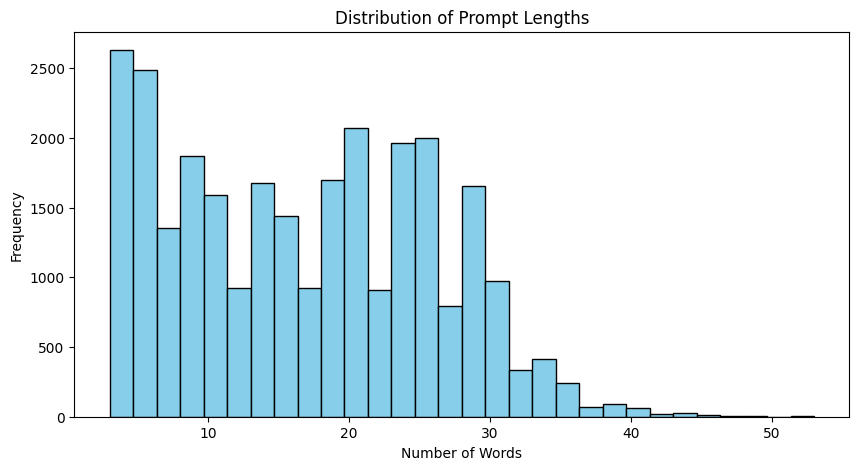

In [ ]:
#plotting the distribution of prompt lengths
plt.figure(figsize=(10, 5))
plt.hist(prompt_lengths, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Prompt Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


In [ ]:
#lenth of json entries
json_lengths=[len(entry.keys()) for entry in json_data]
print(f"Average JSON length: {sum(json_lengths)/len(json_lengths):.2f} keys")


Average JSON length: 1.00 keys


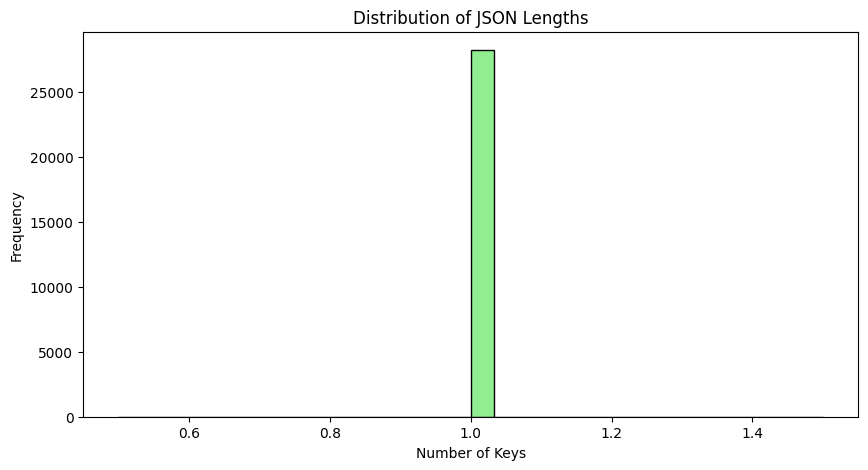

In [ ]:
#plotting json length distribution
plt.figure(figsize=(10, 5))
plt.hist(json_lengths, bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of JSON lengths')
plt.xlabel('Number of kys')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#most common words in prompts
all_words= ' '.join(prompts).split()
word_freq= Counter(all_words)
common_words =word_freq.most_common(20)
words, freqs= zip(*common_words)


<ipython-input-22-d396d64db276>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(freqs), palette='viridis')


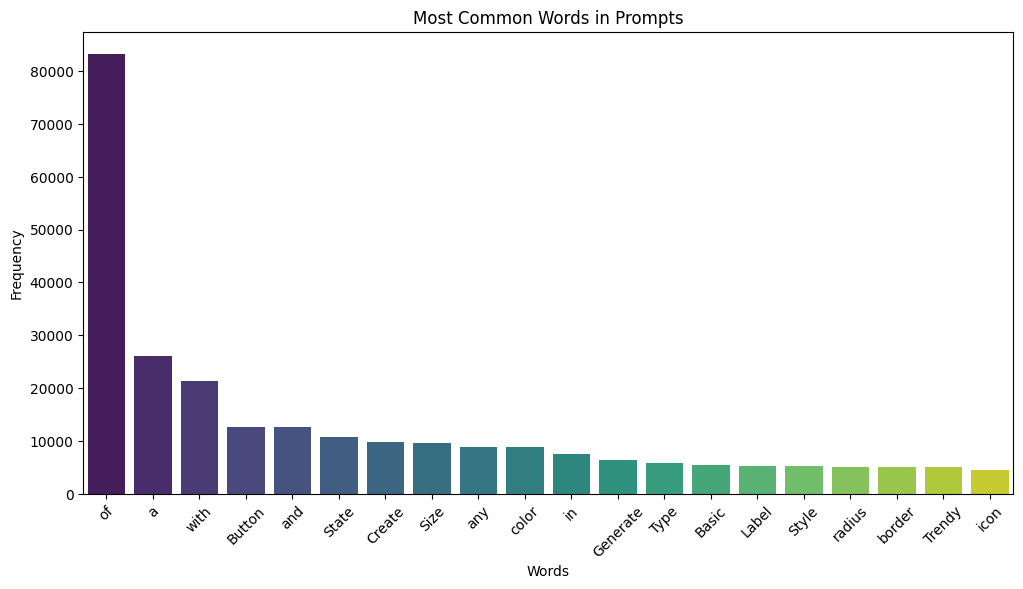

In [ ]:
#plot common words
plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(freqs), palette='viridis')
plt.title('Most Common Words in Prompts')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#testing
print("Example JSON entry:")
print(json.dumps(json_data[0], indent=2))

Example JSON entry:
{
  "variant_properties": {
    "style": "Professional",
    "component_name": "Button",
    "subtype": "Default",
    "variant_details": {
      "State": [
        "Default"
      ],
      "Size": [
        "Small"
      ]
    },
    "name": "State=Default, Size=Small",
    "type": "COMPONENT",
    "width": 105.0,
    "height": 36.0,
    "fills": [
      {
        "color": {
          "r": 1.0,
          "g": 1.0,
          "b": 1.0,
          "a": 1.0
        }
      }
    ],
    "strokes": [],
    "effects": [],
    "layout": {
      "mode": "HORIZONTAL",
      "alignment": {
        "primaryAxis": "",
        "counterAxis": ""
      },
      "sizing": {
        "primaryAxis": "",
        "counterAxis": ""
      },
      "padding": {
        "left": 0,
        "right": 0,
        "top": 0,
        "bottom": 0
      },
      "itemSpacing": 0
    },
    "children": [
      {
        "name": "_Button base",
        "type": "FRAME",
        "width": 105.0,
        "h

## Dataset and split

In [ ]:
class UIDataset(Dataset):
  """class for loading the dataset
  """
  def __init__(self, prompts, json_data):
    """ method to initialise the dataset
    Parameters
    prompts: list of prompts
    json_data: list of json entries
    """
    #initialise prompts data
    self.prompts= prompts
    #initialise json data
    self.json_data =json_data
    #loading the t5 tokenizer
    self.tokenizer= T5Tokenizer.from_pretrained('t5-small')

  def __len__(self):
    """ method to return the length of the dataset
    """
    #length of dataset
    return len(self.prompts)

  def __getitem__(self, idx):
    """ method ot return the item at the given index
    Parameters
    idx: index of the item
    Returns
    input_ids: input ids of the prompt
    attention_mask: attention mask of the prompt
    labels: labels of the json entry
    """
    #get by their indices
    prompt= self.prompts[idx]
    json_data =json.dumps(self.json_data[idx])
    #tokenize prompt
    inputs= self.tokenizer(prompt, return_tensors='pt', padding='longest', truncation=True)
    #tokenize json data
    targets= self.tokenizer(json_data, return_tensors='pt', padding='longest', truncation=True)
    return {
      'input_ids': inputs['input_ids'].squeeze(),
      'attention_mask': inputs['attention_mask'].squeeze(),
      'labels': targets['input_ids'].squeeze()
    }

In [ ]:
dataset= UIDataset(prompts, json_data)
#split to train validation and test sets
train_size =int(0.8 * len(dataset))
val_size= int(0.1 * len(dataset))
test_size= len(dataset) - train_size - val_size

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
train_dataset, val_dataset, test_dataset= random_split(dataset, [train_size, val_size, test_size])

In [ ]:
#dataloader instances
train_loader= DataLoader(train_dataset, batch_size=4, shuffle=True)
val_loader =DataLoader(val_dataset, batch_size=4)
test_loader= DataLoader(test_dataset, batch_size=4)


In [ ]:
#loading tokenizer and model
tokenizer= T5Tokenizer.from_pretrained('t5-small')
model =T5ForConditionalGeneration.from_pretrained('t5-small')

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [ ]:
epochs=12

In [ ]:
#training args for Trainer
training_args= TrainingArguments(
  output_dir='/content/drive/My Drive/Implementation/Final Thesis/FYP/results',
  num_train_epochs=epochs,
  #trainning batch size
  per_device_train_batch_size=4,
  #eval batch size
  per_device_eval_batch_size=4,
  save_steps=500,
  save_total_limit=2,
  logging_steps=10,
  eval_steps=500,
  evaluation_strategy="steps",
  prediction_loss_only=True,
  load_best_model_at_end=True,
  #only if gpu avalable
  fp16=torch.cuda.is_available(),
  #no to push to HF
  push_to_hub=False
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
#data collator for seq2seq
data_collator= DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model)

In [ ]:
#Trainer instance
trainer= Trainer(
  model=model,
  args=training_args,
  train_dataset=train_dataset,
  eval_dataset=val_dataset,
  data_collator=data_collator
)

In [ ]:
#train here first time!
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/data/data_collator.py:646: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:274.)
  batch["labels"] = torch.tensor(batch["labels"], dtype=torch.int64)


Step,Training Loss,Validation Loss
500,0.748800,0.568446
1000,0.554000,0.422727
1500,0.482500,0.367536
2000,0.416800,0.331422
2500,0.417500,0.305540
3000,0.377400,0.286107
3500,0.301100,0.269465
4000,0.345800,0.254370
4500,0.334700,0.243040
5000,0.287500,0.232923


There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight', 'lm_head.weight'].


TrainOutput(global_step=16851, training_loss=0.3220076508960217, metrics={'train_runtime': 2614.6629, 'train_samples_per_second': 25.779, 'train_steps_per_second': 6.445, 'total_flos': 790580100857856.0, 'train_loss': 0.3220076508960217, 'epoch': 3.0})

## Save and load

In [ ]:
#save to drive
model_save_path= '/content/drive/My Drive/Implementation/Final Thesis/FYP/t5_model'
model.save_pretrained(model_save_path)
tokenizer.save_pretrained(model_save_path)

('/content/drive/My Drive/Implementation/Final Thesis/FYP/t5_model/tokenizer_config.json',
 '/content/drive/My Drive/Implementation/Final Thesis/FYP/t5_model/special_tokens_map.json',
 '/content/drive/My Drive/Implementation/Final Thesis/FYP/t5_model/spiece.model',
 '/content/drive/My Drive/Implementation/Final Thesis/FYP/t5_model/added_tokens.json')

In [ ]:
model_save_path= '/content/drive/My Drive/Implementation/Final Thesis/FYP/t5_model'

In [ ]:
def load_model_and_tokenizer(model_path):
  """ method to load the model and tokenizer
  Parameters
  model_path: path to the model and tokenizer
  Return
  model: loaded model
  tokenizer: loaded tokenizer
  """
    model= T5ForConditionalGeneration.from_pretrained(model_path)
    tokenizer =T5Tokenizer.from_pretrained(model_path)
    return model,tokenizer

In [ ]:
#define th emodel and trokenizer from loaded
model, tokenizer = load_model_and_tokenizer(model_save_path)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


### Inference

In [ ]:
def generate_json(prompt, model, tokenizer, max_length=512):
  """ method to generate the json from the prompt
  Parameters
  prompt: prompt to generate the json
  model: model to generate the json
  tokenizer: tokenizer to generate the json
  max_length: maximum length of the json"""
  #tokenizing prompt
  inputs =tokenizer(prompt, return_tensors='pt', padding='max_length', truncation=True, max_length=max_length).to(device)
  #generate from model
  outputs= model.generate(inputs['input_ids'], max_length=max_length, num_beams=5, early_stopping=True)
  #decode output to json string
  generated_json_str = tokenizer.decode(outputs[0], skip_special_tokens=True)
  return generated_json_str

In [ ]:
#example
prompt= "Generate a Professional Button with State of Default, Size of Small."

In [ ]:
generated_json= generate_json(prompt, model, tokenizer)

In [ ]:
print("Generated JSON:", generated_json)

Generated JSON: "variant_properties": "color": "rgba(255, 255, 255, 1.0)", "strokes": ["rgba(255, 255, 255, 1.0)"], "strokeWeight": 1.0, "text": "Button Label", "textColor": "rgba(255, 255, 255, 1.0)", "borderRadius": 4.0, "fontFamily": "SF Pro Text", "fontWeight": 600, "fontSize": 14.0, "effects": ["type": "DROP_SHADOW", "color": "rgba(16, 24, 40, 0.05000000074505806)", "type": "DROP_SHADOW", "color": "rgba(16, 24, 40, 0.05000000074505806)"], "padding": 0, "width": 20.0, "height": 14.0, "x": -2555.0, "y": -1010.0, "style": "Professional", "component_name": "Button", "subtype": "Default", "variant_details": "State": ["Default"], "Size": ["Small"]


In [ ]:
results= trainer.evaluate(eval_dataset=val_dataset)

In [ ]:
print("Evaluation results:", results)

Evaluation results: {'eval_loss': 0.16425271332263947, 'eval_runtime': 21.7132, 'eval_samples_per_second': 129.322, 'eval_steps_per_second': 32.331, 'epoch': 3.0}


## Final training

In [ ]:
#load paired dataset
pairs_file_1= '/content/drive/My Drive/Implementation/Final Thesis/FYP/Data/t5_json_description_pairs.jsonl'

In [ ]:
#define
data_pairs_1 = []

In [ ]:
with open(pairs_file_1, 'r', encoding='utf-8') as f:
  for line in f:
    data_pairs_1.append(json.loads(line))


In [ ]:
#json is input in the dataset
json_data_1 = [pair['input'] for pair in data_pairs_1]

In [ ]:
#description is output in the dataset
prompts_1 = [pair['output'] for pair in data_pairs_1]

In [ ]:
#lengths
print(f"Number of pairs: {len(data_pairs_1)}")

Number of pairs: 28300


In [ ]:
print(f"Number of jsno: {len(json_data_1)}")

Number of jsno: 28300


In [ ]:
print(f"Number of description: {len(prompts_1)}")


Number of description: 28300


In [ ]:
for i in range(2):
  print(f"JSON: {json_data_1[i]}")
  print(f"Description: {prompts_1[i]}")


JSON: {"variant_properties": {"color": "rgba(255, 255, 255, 1.0)", "strokes": ["rgba(126, 86, 216, 1.0)"], "strokeWeight": 1.0, "text": "Button CTA", "textColor": "rgba(255, 255, 255, 1.0)", "borderRadius": 10.0, "fontFamily": "Inter", "fontWeight": 500, "fontSize": 14.0, "effects": [{"type": "DROP_SHADOW", "color": "rgba(16, 24, 40, 0.05000000074505806)"}], "padding": 0, "width": 77.0, "height": 20.0, "x": -4619.0, "y": -2135.0, "hasIcon": false, "style": "Professional", "component_name": "Button", "subtype": "Default", "variant_details": {"State": ["Default"], "Size": ["Small"]}}}
Description: A Button with border radius 10.0.
JSON: {"variant_properties": {"color": "rgba(255, 255, 255, 1.0)", "strokes": ["rgba(126, 86, 216, 1.0)"], "strokeWeight": 1.0, "text": "Button CTA", "textColor": "rgba(255, 255, 255, 1.0)", "borderRadius": 10.0, "fontFamily": "Inter", "fontWeight": 500, "fontSize": 14.0, "effects": [{"type": "DROP_SHADOW", "color": "rgba(16, 24, 40, 0.05000000074505806)"}], "p

In [ ]:
class UIDataset(Dataset):
  """class for loading the dataset
  """
  def __init__(self, prompts, json_data):
    """ method to initialise the dataset
    Parameters
    prompts: list of prompts
    json_data: list of json entries
    """
    #initialise prompts data
    self.prompts= prompts
    #initialise json data
    self.json_data =json_data
    #loading the t5 tokenizer
    self.tokenizer= T5Tokenizer.from_pretrained('t5-small')

  def __len__(self):
    """ method to return the length of the dataset
    """
    #length of dataset
    return len(self.prompts)

  def __getitem__(self, idx):
    """ method ot return the item at the given index
    Parameters
    idx: index of the item
    Returns
    input_ids: input ids of the prompt
    attention_mask: attention mask of the prompt
    labels: labels of the json entry
    """
    #get by their indices
    prompt= self.prompts[idx]
    json_entry =json.dumps(self.json_data[idx])
     #tokenize prompt
    inputs= self.tokenizer(prompt, return_tensors='pt', padding='longest', truncation=True)
    #tokenize json data
    targets= self.tokenizer(json_entry, return_tensors='pt', padding='longest', truncation=True)
    return {
      'input_ids': inputs['input_ids'].squeeze(),
      'attention_mask': inputs['attention_mask'].squeeze(),
      'labels': targets['input_ids'].squeeze()
    }

In [ ]:
dataset = UIDataset(prompts_1,json_data_1)
#split to train validation and test sets
train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have

In [ ]:
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])


In [ ]:
#dataloader instances
train_loader=DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader=DataLoader(val_dataset, batch_size=8)
test_loader= DataLoader(test_dataset, batch_size=8)


In [ ]:
#loading tokenizer and model
tokenizer=T5Tokenizer.from_pretrained('t5-small')
model=T5ForConditionalGeneration.from_pretrained('t5-small')

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
#training args for Trainer
training_args= TrainingArguments(
  output_dir='/content/drive/My Drive/Implementation/Final Thesis/FYP/JSON generation/T5 NORMAL SIMPLE',
  num_train_epochs=epochs,
  #trainning batch size
  per_device_train_batch_size=32,
  #eval batch size
  per_device_eval_batch_size=32,
  save_steps=500,
  save_total_limit=2,
  logging_steps=10,
  eval_steps=500,
  evaluation_strategy="steps",
  prediction_loss_only=True,
  load_best_model_at_end=True,
  #run! fast
  fp16=True,
  #no to push to HF
  push_to_hub=False
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
#data collator for seq2seq
data_collator= DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model)

In [ ]:
#Trainer instance
trainer= Trainer(
  model=model,
  args=training_args,
  train_dataset=train_dataset,
  eval_dataset=val_dataset,
  data_collator=data_collator
)

In [ ]:
#train here first time!
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/data/data_collator.py:646: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:274.)
  batch["labels"] = torch.tensor(batch["labels"], dtype=torch.int64)


Step,Training Loss,Validation Loss
500,0.534200,0.386273
1000,0.366800,0.287510
1500,0.310700,0.241727
2000,0.268200,0.214352
2500,0.255900,0.195740
3000,0.224000,0.181414
3500,0.218300,0.171029
4000,0.210800,0.162896
4500,0.200000,0.155805
5000,0.196600,0.150225


There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight', 'lm_head.weight'].


TrainOutput(global_step=8496, training_loss=0.2865299073007596, metrics={'train_runtime': 5813.1145, 'train_samples_per_second': 46.736, 'train_steps_per_second': 1.462, 'total_flos': 4170168504680448.0, 'train_loss': 0.2865299073007596, 'epoch': 12.0})

In [ ]:
#path to save MODEL
model_save_path= '/content/drive/My Drive/Implementation/Final Thesis/FYP/JSON generation/T5 NORMAL SIMPLE/'

In [ ]:
model.save_pretrained(model_save_path)

In [ ]:
tokenizer.save_pretrained(model_save_path)

('/content/drive/My Drive/Implementation/Final Thesis/FYP/JSON generation/T5 NORMAL SIMPLE/tokenizer_config.json',
 '/content/drive/My Drive/Implementation/Final Thesis/FYP/JSON generation/T5 NORMAL SIMPLE/special_tokens_map.json',
 '/content/drive/My Drive/Implementation/Final Thesis/FYP/JSON generation/T5 NORMAL SIMPLE/spiece.model',
 '/content/drive/My Drive/Implementation/Final Thesis/FYP/JSON generation/T5 NORMAL SIMPLE/added_tokens.json')

In [ ]:
def load_model_and_tokenizer(model_path):
   """ method to load the model and tokenizer
  Parameters
  model_path: path to the model and tokenizer
  Return
  model: loaded model
  tokenizer: loaded tokenizer
  """
  model= T5ForConditionalGeneration.from_pretrained(model_path)
  tokenizer= T5Tokenizer.from_pretrained(model_path)
  return model,tokenizer

In [ ]:
#define th emodel and trokenizer from loaded
model, tokenizer=load_model_and_tokenizer(model_save_path)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
def generate_json(prompt, model, tokenizer, max_length=1024):
 """ method to generate the json from the prompt
  Parameters
  prompt: prompt to generate the json
  model: model to generate the json
  tokenizer: tokenizer to generate the json
  max_length: maximum length of the json"""
  device='cuda' if torch.cuda.is_available() else 'cpu'
  model.to(device)
  #tokenizing prompt
  inputs= tokenizer(prompt, return_tensors='pt', padding='max_length', truncation=True, max_length=max_length).to(device)
  #generate from model
  outputs =model.generate(inputs['input_ids'],max_length=max_length,num_beams=5,early_stopping=True,temperature=0)
  #decode output to json string
  generated_json_str = tokenizer.decode(outputs[0], skip_special_tokens=True)
  return generated_json_str

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)

T5ForConditionalGeneration(
  (shared): Embedding(32128, 512)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 512)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=512, out_features=512, bias=False)
              (k): Linear(in_features=512, out_features=512, bias=False)
              (v): Linear(in_features=512, out_features=512, bias=False)
              (o): Linear(in_features=512, out_features=512, bias=False)
              (relative_attention_bias): Embedding(32, 8)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=512, out_features=2048, bias=False)
              (wo): Linear(in_features=2048, out_features=512, bias=False)
              (dropout): Drop

In [ ]:
results= trainer.evaluate(eval_dataset=val_dataset)

In [ ]:
print("Evaluation results:", results)

Evaluation results: {'eval_loss': 0.16425271332263947, 'eval_runtime': 21.7132, 'eval_samples_per_second': 129.322, 'eval_steps_per_second': 32.331, 'epoch': 3.0}


## Nested

In [ ]:
#lists
json_data=[]
prompts=[]

In [ ]:
# load json-only
json_only_input= '/content/drive/My Drive/Implementation/Final Thesis/FYP/Data/nested_dataset.jsonl'

In [ ]:
# json_only= '/content/drive/My Drive/Implementation/Final Thesis/FYP/Data/nested_dataset_5.jsonl'

In [ ]:
jsons = []

In [ ]:
# with open(json_only_input, 'r', encoding='utf-8') as f:
#   for line in f:
#     json_data = json.loads(line)
#    #get 5 times
#     for _ in range(5):
#       jsons.append(json_data)

In [ ]:
with open(json_only, 'w', encoding='utf-8') as f:
  for data in jsons:
    f.write(json.dumps(data) + '\n')

In [ ]:
#load prompt only
prompt_only ='/content/drive/My Drive/Implementation/Final Thesis//FYP/Data/t5_descriptions.txt'

In [ ]:
with open(prompt_only, 'r', encoding='utf-8') as f:
  prompts=[line.strip() for line in f]

In [ ]:
print(f"Number of prompts: {len(prompts)}")
print(f"Number of JSON entries: {len(jsons)}")

Number of prompts: 28240
Number of JSON entries: 28240


In [ ]:
class UIDataset(Dataset):
  """class for loading the dataset
  """
  def __init__(self, prompts, json_data):
    """ method to initialise the dataset
    Parameters
    prompts: list of prompts
    json_data: list of json entries
    """
    self.prompts= prompts
    self.json_data =json_data
    self.tokenizer= T5Tokenizer.from_pretrained('t5-small')

  def __len__(self):
    """ method to return the length of the dataset """
    return len(self.prompts)

  def __getitem__(self, idx):
    """ method ot return the item at the given index
    Parameters
    idx: index of the item
    Returns
    input_ids: input ids of the prompt
    attention_mask: attention mask of the prompt
    labels: labels of the json entry
    """
    #get by their indices
    prompt= self.prompts[idx]
    json_entry =json.dumps(self.json_data[idx])
    #tokenize prompt
    inputs= self.tokenizer(prompt, return_tensors='pt', padding='longest', truncation=True)
    #tokenize json data
    targets= self.tokenizer(json_entry, return_tensors='pt', padding='longest', truncation=True)
    return {
      'input_ids': inputs['input_ids'].squeeze(),
      'attention_mask': inputs['attention_mask'].squeeze(),
      'labels': targets['input_ids'].squeeze()
    }

In [ ]:
dataset = UIDataset(prompts,jsons)
#split to train validation and test sets
train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

In [ ]:
#dataloader instances
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8)
test_loader = DataLoader(test_dataset, batch_size=8)


In [ ]:
#loading tokenizer and model
tokenizer = T5Tokenizer.from_pretrained('t5-small')
model = T5ForConditionalGeneration.from_pretrained('t5-small')

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [ ]:
#training args for Trainer
training_args= TrainingArguments(
  output_dir='/content/drive/My Drive/Implementation/Final Thesis/FYP/JSON generation/T5 NESTED',
  num_train_epochs=epochs,
    #trainning batch size
  per_device_train_batch_size=32,
  #eval batch size
  per_device_eval_batch_size=32,
  save_steps=500,
  save_total_limit=2,
  logging_steps=10,
  eval_steps=500,
  evaluation_strategy="steps",
  prediction_loss_only=True,
  load_best_model_at_end=True,
  #to train fast
  fp16=True,
  #no to push to HF
  push_to_hub=False
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
#data collator for seq2seq
data_collator= DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model)

In [ ]:
#Trainer instance
trainer= Trainer(
  model=model,
  args=training_args,
  train_dataset=train_dataset,
  eval_dataset=val_dataset,
  data_collator=data_collator
)

In [ ]:
#train here nested first time!
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/data/data_collator.py:646: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:274.)
  batch["labels"] = torch.tensor(batch["labels"], dtype=torch.int64)


Step,Training Loss,Validation Loss
500,0.883200,0.700656
1000,0.652200,0.526746
1500,0.558900,0.437848
2000,0.510000,0.384534
2500,0.464800,0.346343
3000,0.408500,0.321285
3500,0.417500,0.306139
4000,0.430900,0.299114


There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight', 'lm_head.weight'].


TrainOutput(global_step=4236, training_loss=0.6479109965820601, metrics={'train_runtime': 3030.255, 'train_samples_per_second': 44.733, 'train_steps_per_second': 1.398, 'total_flos': 2083113337356288.0, 'train_loss': 0.6479109965820601, 'epoch': 6.0})

In [ ]:
#save to drive
model_save_path= '/content/drive/My Drive/Implementation/Final Thesis/FYP/JSON generation/T5 NESTED'

In [ ]:
model.save_pretrained(model_save_path)

In [ ]:
tokenizer.save_pretrained(model_save_path)

('/content/drive/My Drive/Implementation/Final Thesis/FYP/JSON generation/T5 NESTED/tokenizer_config.json',
 '/content/drive/My Drive/Implementation/Final Thesis/FYP/JSON generation/T5 NESTED/special_tokens_map.json',
 '/content/drive/My Drive/Implementation/Final Thesis/FYP/JSON generation/T5 NESTED/spiece.model',
 '/content/drive/My Drive/Implementation/Final Thesis/FYP/JSON generation/T5 NESTED/added_tokens.json')

In [ ]:
def load_model_and_tokenizer(model_path):
  """ method to load the model and tokenizer
  Parameters
  model_path: path to the model and tokenizer
  Return
  model: loaded model
  tokenizer: loaded tokenizer
  """
  model= T5ForConditionalGeneration.from_pretrained(model_path)
  tokenizer= T5Tokenizer.from_pretrained(model_path)
  return model,tokenizer

In [ ]:
model, tokenizer = load_model_and_tokenizer(model_save_path)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


### Retrain

In [ ]:
#Trainer to retrain
trainer= Trainer(
  model=model,
  args=training_args,
  train_dataset=train_dataset,
  eval_dataset=val_dataset,
  data_collator=data_collator
)

In [ ]:
#train again!
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/data/data_collator.py:646: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:274.)
  batch["labels"] = torch.tensor(batch["labels"], dtype=torch.int64)


Step,Training Loss,Validation Loss
500,0.356700,0.244586
1000,0.323200,0.210822
1500,0.261900,0.185366
2000,0.238000,0.165545
2500,0.234000,0.151042
3000,0.233000,0.139096
3500,0.199700,0.128812
4000,0.186400,0.121605
4500,0.175400,0.115225
5000,0.194100,0.109933


There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight', 'lm_head.weight'].


TrainOutput(global_step=8472, training_loss=0.2186894791061806, metrics={'train_runtime': 6001.6141, 'train_samples_per_second': 45.172, 'train_steps_per_second': 1.412, 'total_flos': 4165685307506688.0, 'train_loss': 0.2186894791061806, 'epoch': 12.0})

In [ ]:
def generate_json(prompt, model, tokenizer, max_length=1024):
  """ method to generate the json from the prompt
  Parameters
  prompt: prompt to generate the json
  model: model to generate the json
  tokenizer: tokenizer to generate the json
  max_length: maximum length of the json
  Return
  generated_json_str: generated json string
  """

  device= 'cuda' if torch.cuda.is_available() else 'cpu'
  model.to(device)
  #tokenizing prompt
  inputs= tokenizer(prompt, return_tensors='pt', padding='max_length', truncation=True, max_length=max_length).to(device)
  outputs =model.generate(inputs['input_ids'],max_length=max_length,num_beams=5,early_stopping=True, temperature=0)
  generated_json_str= tokenizer.decode(outputs[0], skip_special_tokens=True)
  return generated_json_str

In [ ]:
#TEST
description="Create a trendy icon-button with a state of hover"

In [ ]:
generated_json= generate_json(description, model, tokenizer)


/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:515: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


In [ ]:
print(generated_json)

"variant_properties": "style": "Basic", "component_name": "icon-button", "subtype": "Circle", "variant_details": "State": ["Hover"], "name": "State=Hover", "type": "COMPONENT", "children": ["name": "Content", "type": "FRAME", "width": 24.0, "height": 24.0, "fills": [], "strokes": [], "effects": [], "borderRadius": 0, "strokeWeight": 1.0, "children": ["name": "Icon / SearchOutlined", "type": "INSTANCE", "children": ["name": "Vector", "type": "VECTOR", "iconWidth": 14.06256103515625, "iconHeight": 14.06256103515625, "iconColor": "r": 0.0, "g": 0.0, "b": 0.0, "a": 1.0], "name": "Button", "type": "TEXT", "fontFamily": "SF Pro Text", "fontWeight": 400, "fontSize": 14.0, "characters": "Button", "textColor": "r": 1.0, "g": 1.0, "b": 1.0, "a": 1.0]
